In [1]:
! git clone https://github.com/garethgeorge/pulse2percept.git

fatal: destination path 'pulse2percept' already exists and is not an empty directory.


In [2]:
! pip uninstall pulse2percept -y
! cd pulse2percept && pip install -r requirements.txt && pip install -r requirements-dev.txt && pip install -e .

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 2.1 MB 2.3 MB/s eta 0:00:01     |████                            | 256 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 9.3 MB/s eta 0:00:01    |█▋                              | 993 kB 4.3 MB/s eta 0:00:05     |█████▍                          | 3.4 MB 4.3 MB/s eta 0:00:04     |█████▊                          | 3.6 MB 4.3 MB/s eta 0:00:04     |██████▎                         | 4.0 MB 4.3 MB/s eta 0:00:04     |█████████████████████▊          | 13.7 MB 9.3 MB/s eta 0:00:01     |██████████████████████▍         | 14.1 MB 9.3 MB/s eta 0:00:01     |██████████████████

     |████████████████████████████████| 509 kB 10.1 MB/s eta 0:00:01
  Created wheel for sphinx-gallery: filename=sphinx_gallery-0.5.0-py3-none-any.whl size=101621 sha256=30f36bc3910799466cd1ed3ab07e9d31fa5b38f1c0dc8fa549022a69a9c4c6d7
  Stored in directory: /home/jovyan/.cache/pip/wheels/af/19/c3/26cd13b1a0c3c6af3d6747a21ecdb1152631826321766dd9c0
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13703 sha256=8e917ce207b0157437f0d35a79ea3e562b8db1e6f2451890c9cd22e6c19f949b
  Stored in directory: /home/jovyan/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built sphinx-gallery docopt
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Obtaining file:///home/jovyan/work/pulse2percept
  Running setup.py develop for pulse2percept


In [1]:
import pulse2percept as p2p
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import numpy as np
import math
from pulse2percept.viz import plot_implant_on_axon_map
from pulse2percept.implants import ArgusII, AlphaAMS
from pulse2percept.models import AxonMapModel
from prima import Prima

In [2]:
model = AxonMapModel(rho=100, axlambda=200)
model.engine = 'serial'
model.build()

AxonMapModel(ax_segments_range=(3, 50), axlambda=200, 
             axon_pickle='axons.pickle', 
             axons_range=(-180, 180), engine='serial', 
             eye='RE', grid_type='rectangular', 
             ignore_pickle=False, loc_od_x=15.5, 
             loc_od_y=1.5, n_ax_segments=500, n_axons=500, 
             n_jobs=-1, rho=100, scheduler='threading', 
             thresh_percept=0, verbose=True, 
             xrange=(-20, 20), xystep=0.25, 
             yrange=(-15, 15))

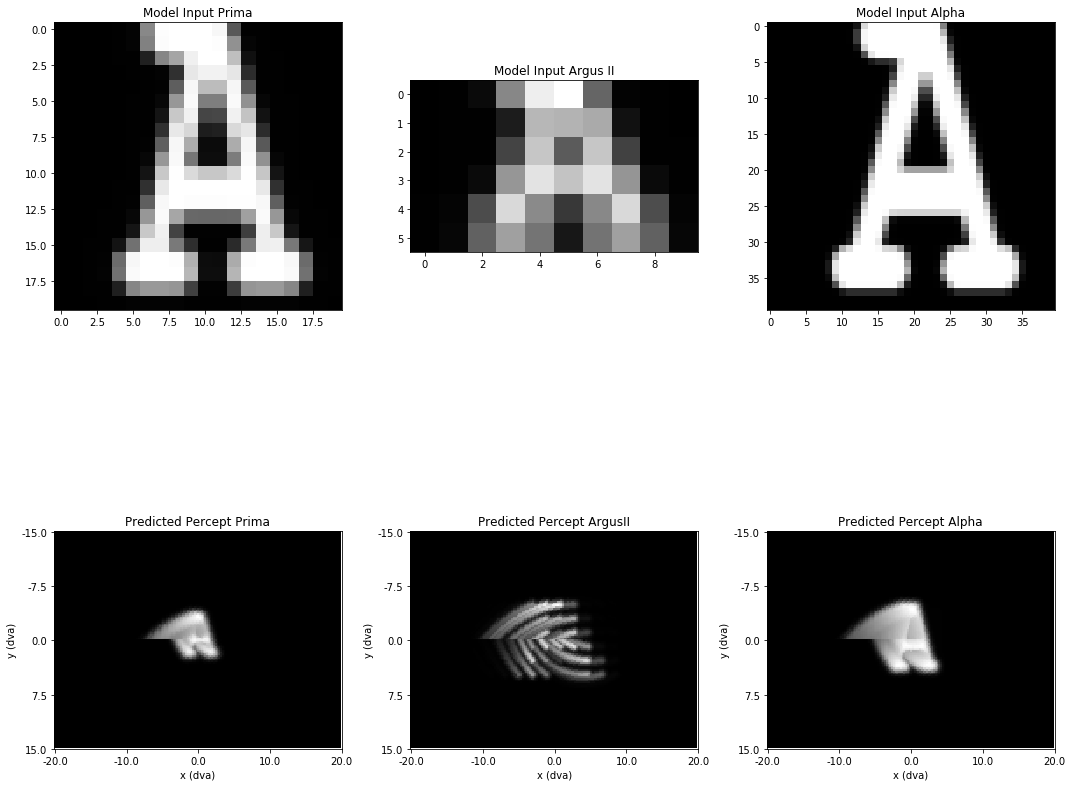

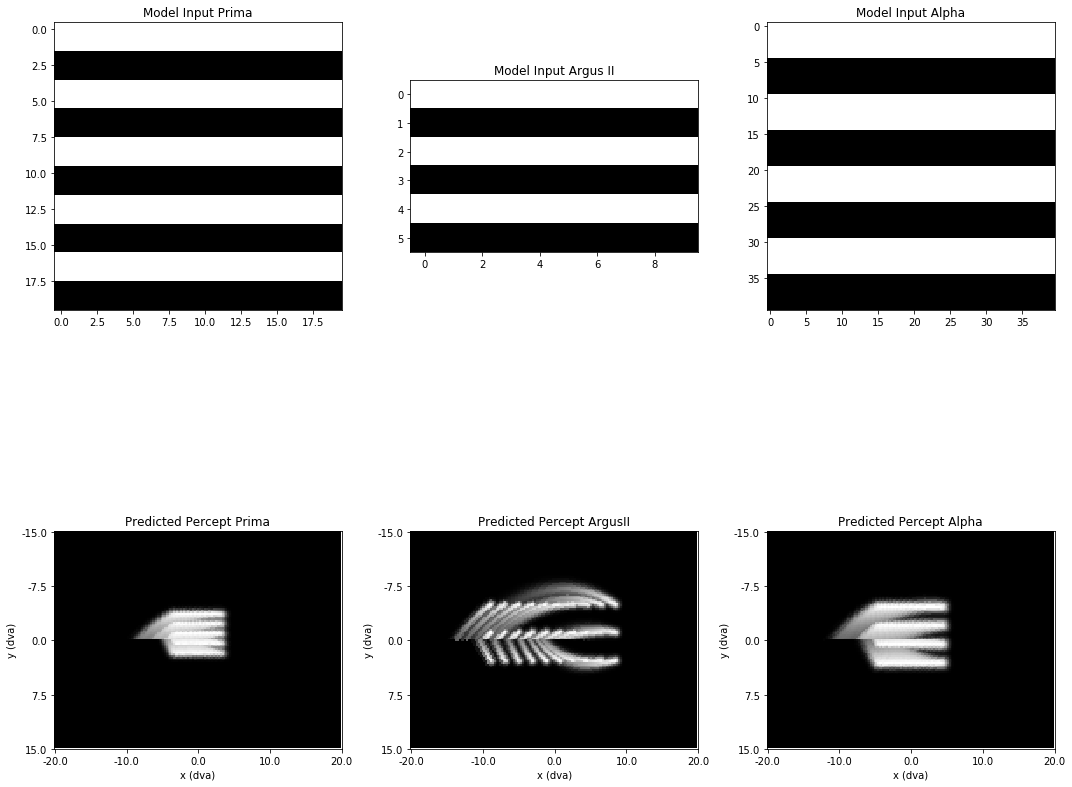

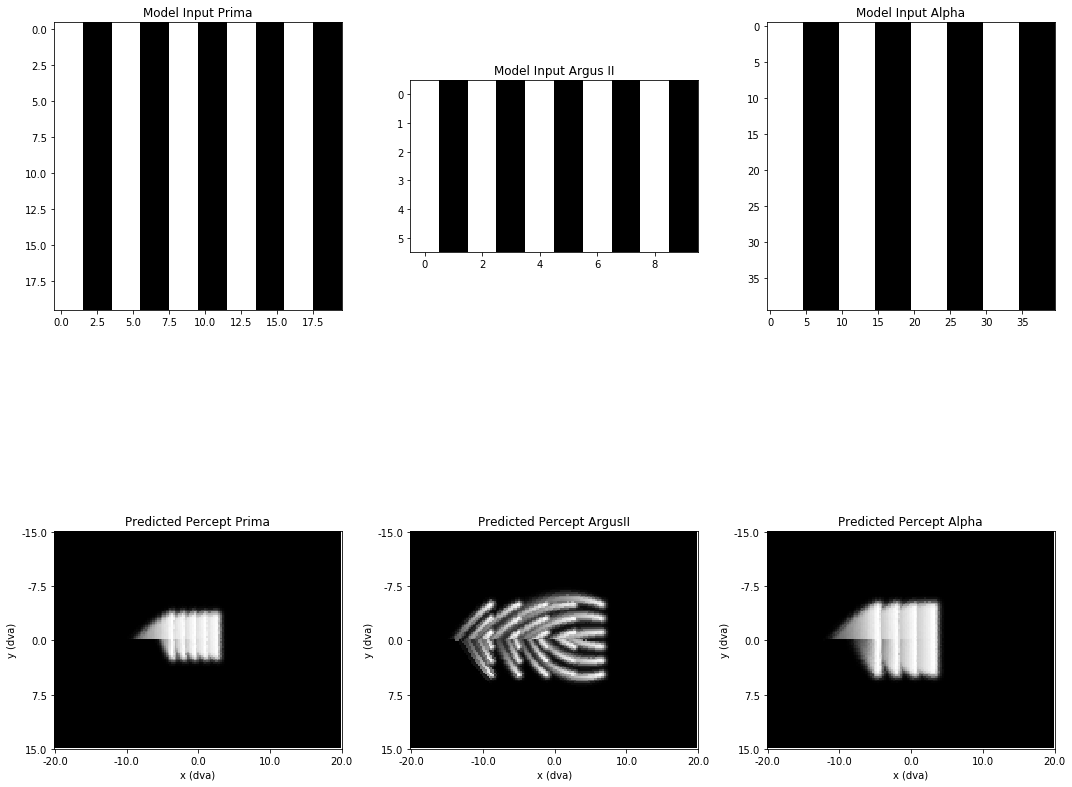

In [7]:
import skimage.io as sio
import skimage.transform as sit
invert = True
datafile = 'letters/A.jpg'
img_in = sio.imread(datafile, as_gray=True)
img_in = img_in[50:150, 40:200]

img_argusII, img_prima, img_alpha = resize_image(img_in)
compare_percepts(img_argusII, img_prima, img_alpha)

img_argusII = generateHorizontalGrating(6,10)
img_prima = generateHorizontalGrating(20,20)
img_alpha = generateHorizontalGrating(40,40)

compare_percepts(img_argusII, img_prima, img_alpha)

img_argusII = generateVerticalGrating(6,10)
img_prima = generateVerticalGrating(20,20)
img_alpha = generateVerticalGrating(40,40)

compare_percepts(img_argusII, img_prima, img_alpha)

In [3]:
def resize_image(img_in, invert = True):
    img_stim_prima = sit.resize(img_in, (20, 20))
    img_stim_argusII = sit.resize(img_in, (6, 10))
    img_alpha = sit.resize(img_in, (40, 40))
    if invert:
        img_stim_prima = 1.0 - img_stim_prima
        img_stim_argusII = 1.0 - img_stim_argusII
        img_alpha = 1.0 - img_alpha
    
    return img_stim_argusII, img_stim_prima, img_alpha
    

In [4]:
def compare_percepts(img_argusII, img_prima, img_alpha): 
    fig, axes = plt.subplots(2, 3, figsize=(15,15))
    fig.figsize = (15,20)
    
    plt.sca(axes[0,0])
    plt.imshow(img_prima, cmap='gray')
    plt.title("Model Input Prima")
    
    plt.sca(axes[0,1])
    plt.imshow(img_argusII, cmap='gray')
    plt.title("Model Input Argus II")
    
    plt.sca(axes[0,2])
    plt.imshow(img_alpha, cmap='gray')
    plt.title("Model Input Alpha")
    
    implant = Prima()
    implant.stim = np.array(img_prima).flatten()
    percept = model.predict_percept(implant)
    
    plt.sca(axes[1,0])
    plt.imshow(percept, cmap='gray')
    plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
    plt.xlabel('x (dva)')
    plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
    plt.ylabel('y (dva)')
    plt.title('Predicted Percept Prima')
    
    implant = ArgusII()
    implant.stim = np.array(img_argusII).flatten()
    percept = model.predict_percept(implant)
    
    plt.sca(axes[1,1])
    plt.imshow(percept, cmap='gray')
    plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
    plt.xlabel('x (dva)')
    plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
    plt.ylabel('y (dva)')
    plt.title('Predicted Percept ArgusII')
    
    implant = AlphaAMS()
    implant.stim = np.array(img_alpha).flatten()
    percept = model.predict_percept(implant)
    
    plt.sca(axes[1,2])
    plt.imshow(percept, cmap='gray')
    plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
    plt.xlabel('x (dva)')
    plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
    plt.ylabel('y (dva)')
    plt.title('Predicted Percept Alpha')
    
    fig.tight_layout()

In [5]:
def generateVerticalGrating(height, width):
    line_width = math.floor(width / 8)
    image = np.zeros((height, width))
    
    solid = True
    count = 0
    for i in range(0,width,1): 
        count += 1
        if(solid): 
            image[:, i] = 1
        if(count == line_width): 
            count = 0 
            solid = not solid
    return image

In [6]:
def generateHorizontalGrating(height, width):
    line_width = max(1, math.floor(height / 8))
    image = np.zeros((height, width))
    
    solid = True
    count = 0
    for i in range(0,height,1): 
        count += 1
        if(solid): 
            image[i, :] = 1
        if(count == line_width): 
            count = 0 
            solid = not solid
    return image